<h1>Tree of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1">INTRODUCTION</a></span></li><li><span><a href="#DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH." data-toc-modified-id="DEDUCTIONS-FROM-THE-PREVIOUS-RESEARCH.-2">DEDUCTIONS FROM THE PREVIOUS RESEARCH.</a></span></li><li><span><a href="#ASSUMPTIONS" data-toc-modified-id="ASSUMPTIONS-3">ASSUMPTIONS</a></span></li><li><span><a href="#TACKLING-ASSUMPTIONS" data-toc-modified-id="TACKLING-ASSUMPTIONS-4">TACKLING ASSUMPTIONS</a></span><ul class="toc-item"><li><span><a href="#Investigating-Relationships-between-features" data-toc-modified-id="Investigating-Relationships-between-features-4.1">Investigating Relationships between features</a></span></li><li><span><a href="#Checking-Collinearity" data-toc-modified-id="Checking-Collinearity-4.2">Checking Collinearity</a></span></li><li><span><a href="#Checking-for-Class-Imbalance" data-toc-modified-id="Checking-for-Class-Imbalance-4.3">Checking for Class Imbalance</a></span></li><li><span><a href="#DEALING-WITH-CLASS-IMBALANCE" data-toc-modified-id="DEALING-WITH-CLASS-IMBALANCE-4.4">DEALING WITH CLASS IMBALANCE</a></span></li><li><span><a href="#Checking-for-Outliers" data-toc-modified-id="Checking-for-Outliers-4.5">Checking for Outliers</a></span><ul class="toc-item"><li><span><a href="#Checking-for-outliers-using-DBSCAN." data-toc-modified-id="Checking-for-outliers-using-DBSCAN.-4.5.1">Checking for outliers using DBSCAN.</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#A.-Interactions-among-Features" data-toc-modified-id="A.-Interactions-among-Features-5.1">A. Interactions among Features</a></span></li><li><span><a href="#B.-Dimensionality-reduction-using-PCA" data-toc-modified-id="B.-Dimensionality-reduction-using-PCA-5.2">B. Dimensionality reduction using PCA</a></span></li></ul></li><li><span><a href="#Feature-Selection-and-Model-Building" data-toc-modified-id="Feature-Selection-and-Model-Building-6">Feature Selection and Model Building</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7">Model Evaluation</a></span></li><li><span><a href="#THE-CONFUSION-MATRIX" data-toc-modified-id="THE-CONFUSION-MATRIX-8">THE CONFUSION MATRIX</a></span></li><li><span><a href="#RECEIVER-OPERATING-CHARACTERISTIC" data-toc-modified-id="RECEIVER-OPERATING-CHARACTERISTIC-9">RECEIVER OPERATING CHARACTERISTIC</a></span><ul class="toc-item"><li><span><a href="#LEARNING-CURVE" data-toc-modified-id="LEARNING-CURVE-9.1">LEARNING CURVE</a></span></li></ul></li><li><span><a href="#VALIDATION-CURVE" data-toc-modified-id="VALIDATION-CURVE-10">VALIDATION CURVE</a></span></li><li><span><a href="#SUMMARY" data-toc-modified-id="SUMMARY-11">SUMMARY</a></span></li></ul></div>

## INTRODUCTION
In my previous research, I trained a **Logistic Regression** model with data that I hadn't extensively preprocessed. I did not follow any of the assumptions with regards to using Logistic Regression, and I was able to achieve an accuracy of about 57.2%. In this notebook however, I will follow the assumptions, and observe how my model performs.

## DEDUCTIONS FROM THE PREVIOUS RESEARCH.
- With k-fold cross validation, I only achieved an accuracy of 57.2% on the test set.
- With the learning curve, I was able to tell that adding more training samples will not change the accuracy significantly.
- With the learning curve, I was also able to tell that the model totally "underfits" the data.
- With the validation curve, I was able to tell that the model didn't do too well with variations in regularization strength.
- I noticed that there was large imbalance in the class with about an 80:20 ratio.
- With the confusion matrix, I was able to tell the number of misclassified samples.

## ASSUMPTIONS

- Logisitic regression does not **require a linear relationship** between the dependent and independent variable.
- **Homoscedasticity** is not required unlike in linear regression.
- The dependent variable is **not** measured on an interval.
- Observations must be **independent** of each other, in other words, observations should not come from repeated measurements or matched data.
- Logistic regression assumes **linearity of independent variables and log odds**.
- The dependent variable should be **dichotomous** in nature.
- It works well when there are **no outliers** in your data.
- It also works well when there is **no multicollinearity** in our predictors. 
- The dataset must be **linearly seperable**.
- Logistic regression works well with a **balance in class distribution**.

## TACKLING ASSUMPTIONS

### Investigating Relationships between features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## grabbing the data
data = pd.read_csv('Churn_Modelling.csv')

## dropping 3 features
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

## encoding categorical features
geo_dict = {val:idx for idx, val in enumerate(np.unique(data['Geography'].values))}
gen_dict = { val : idx for idx, val in enumerate(np.unique(data['Gender'].values))}

## mapping 
data['Geography'] = data['Geography'].map(geo_dict)
data['Gender'] = data['Gender'].map(gen_dict)

## this is where seaborn's pairplot() function shines

##sns.pairplot(data)
data.head()




We can tell from our plot that some of the features are linearly separable where as some are not.

### Checking Collinearity

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
cols = data.columns
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 15}, yticklabels=cols, xticklabels=cols)
plt.show()

It can be seen that the strength of collinearity is indeed very weak with the highest being 0.3 (Balance and NumOfProducts)

### Checking for Class Imbalance

In [ ]:
## let's count the number of customers who have churned as well as those who haven't
data = pd.read_csv('Churn_Modelling.csv')
exited = np.array(data['Exited'].values)
churned = np.sum(exited == 1).astype(int)
not_churned = np.sum(exited == 0).astype(int)
total = churned + not_churned
print('The percentage of customers that churned: %.3f%%' % (churned/total * 100))
print('The percentage of customers that did not churned: {}%'.format(not_churned/total * 100))
print('the total number of samples: %d' % int(total))

"""
or 
df = pd.read_csv('Churn_Modelling.csv')
df['Exited'].value_counts().sort_values(ascending=False)
"""


### DEALING WITH CLASS IMBALANCE
Constructing a new dataset

In [ ]:
from sklearn.utils import resample
import pandas as pd

## grab the entire data
data = pd.read_csv('Churn_Modelling.csv')

## drop a few columns
data_ = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

## grab the target variable
exited = data['Exited']

## grab the unique values
values = data['Exited'].value_counts()
print ('Number of class 1 samples before : {}'.format(values[1]))

## let's grab our training data
data_upsampled, exited_upsampled = resample(data_[exited == 1], exited[exited == 1], replace=True, n_samples=data_[exited == 0].shape[0], random_state=123)

## Now let's find out the number of class 1 samples
print('Number of class 1 samples after : {}'.format(data_upsampled.shape[0]))

## let's now stack the original class 0 samples with the upsampled class 1 subset.
data_bal = np.vstack((data_[exited == 0], data_upsampled))
exited_bal = np.hstack((exited[exited == 0], exited_upsampled))

# majority vote prediction should achieve 50 percent
# y_pred = np.zeros(exited_bal.shape[0])
# np.mean(y_pred == exited_bal)


data_bal = pd.DataFrame(data_bal, columns=['Credit Score', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

## let's dummy up a few features
geog_gend = pd.get_dummies(data_bal[['Geography', 'Gender']], drop_first=True)

## appending the dummied features to the main dataframe
## first drop the original data
data_bal = data_bal.drop(['Geography', 'Gender'], axis=1)

## now append the dummied features
data_bal['Geography_Germany'] = geog_gend['Geography_Germany']
data_bal['Geography_Spain'] = geog_gend['Geography_Spain']
data_bal['Gender_Male'] = geog_gend['Gender_Male']

# let's append 'exited' to this dataframe for future use
data_bal['Exited'] = exited_bal

## saving the data_bal
data_bal.to_csv('data_bal.csv', index=False)

## reading data_bal back in
data_bal = pd.read_csv('data_bal.csv')
data_bal.shape



The dataframe I imported earlier ***(data)*** has been modified now ***(data_bal)***. I'll use this dataframe for further analysis ***(data_bal)***.

There is a huge imbalance in the distribution of the class.

### Checking for Outliers

There are various ways to test for outliers in the data however in this notebook, I'll explore **1 multivariate method** and **1 univariate method** - **DBSCAN (Density Clustering)** and the **Tukey Method using a box plot** respectively.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_bal = pd.read_csv('data_bal.csv')

features = ['EstimatedSalary', 'Age', 'Balance', 'Credit Score', 'Tenure', 'NumOfProducts']

green_diamond = dict(markerfacecolor='g', marker='o')


fig, axes = plt.subplots(1, len(features), figsize=(30, 5))
for feature in features:
        axes[features.index(feature)].boxplot(data_bal[feature], flierprops=green_diamond)
        axes[features.index(feature)].set_title('Box Plot for %s' % feature, loc='center', pad=5 )
        plt.tight_layout()
        
plt.show()




Looks like the **Age** feature has the most outliers, with the **Credit Scores** to follow. The **Number of Products feature** has just an outlier.

#### Checking for outliers using DBSCAN.

**DBSCAN - Density Based Spatial Clustering of Applications with Noise**, assigns cluster labels based on **dense regions of points**. In DBSCAN, the notion of density is density is defined as the number of points within a specified radius, **r**.

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data_bal = pd.read_csv('data_bal.csv')

X = np.array(data_bal[['Age', 'Balance']])
sc = StandardScaler()
X_std = sc.fit_transform(X)
# plt.scatter(X_std[:900, 0], X_std[:900, 1])
db = DBSCAN(eps=0.4, min_samples=20, metric='euclidean')
y_db = db.fit_predict(X_std)
plt.scatter(X_std[y_db == -1, 0], X_std[y_db == -1, 1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X_std[y_db == 0, 0], X_std[y_db == 0, 1], c='red', marker='o', s=40, label='cluster 2')
plt.legend()
plt.show()
np.unique(y_db)





This is could be super inaccurate and I am hoping that someone can help me with this.

## Feature Engineering

Essentially, increasing or decreasing dimensionality. I decided to increase the dimensions since the original dataset is not highly dimensional.
### A. Interactions among Features

- A simple two-way interaction is represented by:
     - X3 = X1 * X2 where X3 is the interaction between X1 and X2.

- Adding interaction terms as additional new features to your model is useful for your model if the impact of two or more features on the outcome is **non-additive**.

- Note that interactions amongst dummy variables belonging to the same categorical feature are always zero.

Although it is very easy to calculate two-way interactions amongst all features, it is very computationally expensive
- 10 features = 45 two-way interaction terms
- 50 features = 1,225 two-way interaction terms
- 100 features = 4,950 two-way interaction terms
- 500 features = 124,750 two-way interaction terms
- Recommend understanding your data and domain if possible and selectively choosing   interaction terms.

In [15]:
## Use PolynomialFeatures in sklearn.preprocessing to creat two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + [' '.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    ## Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df



In [ ]:
import pandas as pd

data_bal = pd.read_csv('data_bal.csv')
new_data_bal = add_interactions(data_bal.drop(['Exited'], axis=1))
new_data_bal['Exited'] = data_bal['Exited']
new_data_bal.to_csv('data_balAddedInteractions.csv', index=False)

## reading it back in
new_data_bal = pd.read_csv('data_balAddedInteractions.csv')
new_data_bal.head()

### B. Dimensionality reduction using PCA 

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data.


- Each principle component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated princpal components.


- Use cases for modelling:
    - One of the most common dimensionality reduction techniques.
    - Use if there are too many features or if observation/feature ratio is poor.
    - Also, potentially good option if there are a lot of highly correlated variables in your dataset.
    
    
- Unfortunately, PCA makes models a lot harder to interpret.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
data_pc_pca = pd.DataFrame(pca.fit_transform(data_bal))
data_pc_pca.head()


I will not reduce the dimensions of the dataset now though.

In [ ]:
data_pc_pca.shape

 ## Feature Selection and Model Building

Here, I'll build the model using the data I've processed. Keeping my fingers crossed ...

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp

## read the balanced dataset with interactions
balanced_data = pd.read_csv('data_balAddedInteractions.csv')

## change dataset to numpy arrays
X = np.array(balanced_data.drop(['Exited'], axis=1))
y = np.array(balanced_data['Exited'])

## split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# select the number of best features
import sklearn.feature_selection
select = sklearn.feature_selection.SelectKBest(k=50)

## get the selected features
selected_features = select.fit(X_train, y_train)

## get the indices of the selected features
indices_selected = selected_features.get_support(indices=True)


## usable dataset
X_train_selected = X_train[:, indices_selected]
X_test_selected = X_test[:, indices_selected]



## standardizing X_train_selected and X_test_selected
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_selected)
X_test_std = sc.transform(X_test_selected)

## Creating the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1, solver='lbfgs', max_iter = 1000)
model.fit(X_train_std, y_train)

## get probabilities for the roc_auc score
## this value should be close to the area under the curve plotted below
y_hat = [x[1] for x in model.predict_proba(X_test_std)]


## Model Evaluation
I was able to achieve an accuracy of 71.3% with this model, which is a significantly better performance compared to the model built without any preprocessing. I'll now evaluate the model using :
- The confusion matrix
- The Learning Curve
- The validation Curve
- The ROC curve

## THE CONFUSION MATRIX

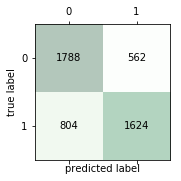

In [28]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test_std)
confmat = confusion_matrix(y_true = y_test, y_pred = y_predicted)

## and we have our confusion matrix, let's make it look a little bit prettier
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## RECEIVER OPERATING CHARACTERISTIC

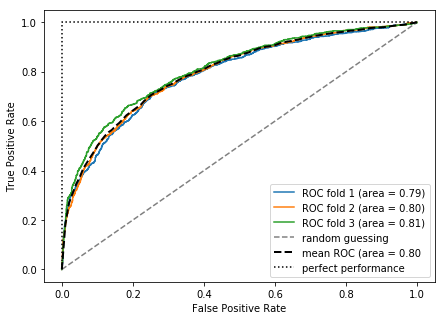

In [24]:
## finding the area under the curve
from sklearn.metrics import roc_auc_score
auc_ = roc_auc_score(y_test, y_hat)

## finding the accuracy
score_test = model.score(X_test_std, y_test)
score_train = model.score(X_train_std, y_train)


## let's create a list of our cross_validation splits
from sklearn.model_selection import StratifiedKFold
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train_std, y_train))

## let's create a new figure for our curve
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

## plot the ROC curves for each fold

for i, (train, test) in enumerate(cv):
    probas = model.fit(X_train_std[train], y_train[train]).predict_proba(X_train_std[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))


## Let's plot the curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.5, 0.5, 0.5), label='random guessing')


## grabbing the mean_tpr over k=3 splits
mean_tpr = mean_tpr / len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', label='mean ROC (area = %0.2f' % mean_auc, linewidth=2)

## let's plot the curve for perfect performance
plt.plot([0, 0, 1], [0, 1, 1], 'k:', label='perfect performance')

# Some Annotation
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### LEARNING CURVE

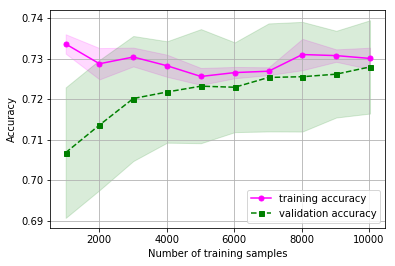

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train_std, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='magenta', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='magenta')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.7, 1])
plt.show()

## VALIDATION CURVE

<function matplotlib.pyplot.legend(*args, **kwargs)>

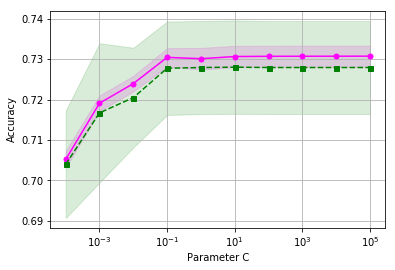

In [27]:
from sklearn.model_selection import validation_curve

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train_std, y=y_train, param_name='C', param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='magenta', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='magenta')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)

plt.grid(True)
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend

## SUMMARY

In this notebook, I presented the assumptions that need to be considered if LogisticRegression is to be used as an algorithm for a certain classification problem. I was not able to fully adhere to all the assumptions however, I did consider more than 50% of them. The model achieved an accuracy of 71.3%, a 14.1% increase in performance since the last model. I also assessed the performance of the model using 3 well known techniques.